<a href="https://colab.research.google.com/github/Gladn/DM/blob/main/Cats%20_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение

Создание простой сверточной нейронной сети

# Кошки и собаки

Создание нейронной сети для различия кошек и собак
Используются библиотека tensorflow
https://www.tensorflow.org/

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from matplotlib import pyplot as pyplot

Необоходимо привести изображения к одному виду, одиного размера


In [ ]:
def preproccess(img, label):
  return tf.image.resize(img,[200,200])/255, label

Необходимо все данные разделить на несколько частей train()/valid()/test()

In [ ]:
split = ["train[:70%]","train[70%:]"]

сами датасеты 

In [ ]:
trainDataset,testDataset = tfds.load(name = 'cats_vs_dogs', 
                                     split = split, 
                                     as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteO53XN1/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


Разделение всего куска датасета на пакеты(партии) batch, чтоб не было перегрузки

In [ ]:
trainDataset = trainDataset.map(preproccess).batch(32)
testDataset = testDataset.map(preproccess).batch(32)

Модель и ее параметры 
Сверточной слой его размеры и шаги
maxpooling самое больше число из операции свертки 

flatten - создание массива из матрицы
dense слои 

In [ ]:
model = keras.Sequential([keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape =(200,200,3)),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(512,activation = 'relu'),
                          keras.layers.Dense(1,activation = 'sigmoid'),                      
])

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

trainHistory1 = model.fit(trainDataset, epochs=8,validation_data=testDataset)

Epoch 1/3
509/509 [==============================] - 644s 1s/step - loss: 0.6189 - accuracy: 0.6719 - val_loss: 0.5338 - val_accuracy: 0.7273
Epoch 2/3
509/509 [==============================] - 612s 1s/step - loss: 0.5029 - accuracy: 0.7539 - val_loss: 0.5080 - val_accuracy: 0.7507
Epoch 3/3
509/509 [==============================] - 608s 1s/step - loss: 0.4002 - accuracy: 0.8175 - val_loss: 0.5902 - val_accuracy: 0.7177


--------------------------------------------

Создание графиков 

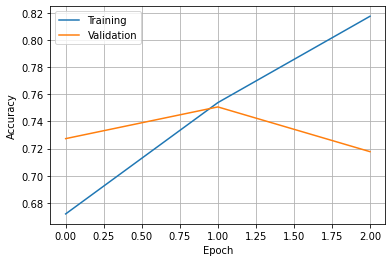

In [ ]:
pyplot.plot(trainHistory1.history['accuracy'])
pyplot.plot(trainHistory1.history['val_accuracy'])
pyplot.ylabel('Accuracy')
pyplot.xlabel("Epoch")
pyplot.legend(['Training','Validation'])
pyplot.grid()
pyplot.show()

Точность первой модели

In [ ]:
(loss, accuracy) = model.evaluate(testDataset)
print(loss)
print(accuracy)

219/219 [==============================] - 69s 313ms/step - loss: 0.5902 - accuracy: 0.7177
0.5902100801467896
0.717724621295929


Сохранение модели

In [ ]:
model.save("model1.h5")

Проверка модели 

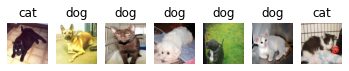

In [ ]:
model = keras.models.load_model("model1.h5")
predictions = model.predict(testDataset.take(7))

classNames=['cat','dog']

i = 0
fig, ax = pyplot.subplots(1,7)
for image, _ in testDataset.take(7):
  predictedLabel = int(predictions[i] >= 0.5)

  ax[i].axis('off')
  ax[i].set_title(classNames[predictedLabel])
  ax[i].imshow(image[i])
  i += 1

pyplot.show()

Создание второй модели 

In [79]:
model = keras.Sequential([keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape =(200,200,3)),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Conv2D(128,(3,3),activation = 'relu'),
                          keras.layers.MaxPooling2D((2,2)),
                          keras.layers.Flatten(),
                          keras.layers.Dense(512,activation = 'relu'),
                          keras.layers.Dense(1,activation = 'sigmoid')                     
])

In [80]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

trainHistory = model.fit(trainDataset, epochs=5,validation_data=testDataset)

Epoch 1/5
509/509 [==============================] - 1407s 3s/step - loss: 0.6811 - accuracy: 0.5638 - val_loss: 0.6223 - val_accuracy: 0.6702
Epoch 2/5
509/509 [==============================] - 1393s 3s/step - loss: 0.5580 - accuracy: 0.7132 - val_loss: 0.5335 - val_accuracy: 0.7245
Epoch 3/5
509/509 [==============================] - 1272s 2s/step - loss: 0.4501 - accuracy: 0.7883 - val_loss: 0.4765 - val_accuracy: 0.7621
Epoch 4/5
509/509 [==============================] - 1257s 2s/step - loss: 0.3762 - accuracy: 0.8303 - val_loss: 0.4167 - val_accuracy: 0.8086
Epoch 5/5
509/509 [==============================] - 1256s 2s/step - loss: 0.2995 - accuracy: 0.8731 - val_loss: 0.4403 - val_accuracy: 0.8021


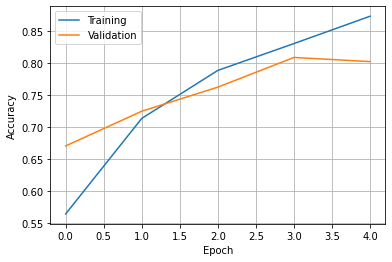

In [81]:
pyplot.plot(trainHistory.history['accuracy'])
pyplot.plot(trainHistory.history['val_accuracy'])
pyplot.ylabel('Accuracy')
pyplot.xlabel("Epoch")
pyplot.legend(['Training','Validation'])
pyplot.grid()
pyplot.show()

In [82]:
(loss, accuracy) = model.evaluate(testDataset)
print(loss)
print(accuracy)

219/219 [==============================] - 131s 595ms/step - loss: 0.4403 - accuracy: 0.8021
0.4403094947338104
0.8021206259727478


In [83]:
model.save("model2.h5")

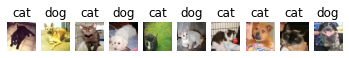

In [85]:
model = keras.models.load_model("model2.h5")
predictions = model.predict(testDataset.take(10))

classNames=['cat','dog']

i = 0
fig, ax = pyplot.subplots(1,10)
for image, _ in testDataset.take(10):
  predictedLabel = int(predictions[i] >= 0.5)
  ax[i].axis('off')
  ax[i].set_title(classNames[predictedLabel])
  ax[i].imshow(image[i])
  i += 1

pyplot.show()

In [ ]:
model = keras.models.load_model("model1.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [86]:
model = keras.models.load_model("model2.h5")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 23, 23, 128)     

In [ ]:
from IPython.display import Image as Im
import numpy

In [87]:
Image1 = '1234.jpg'

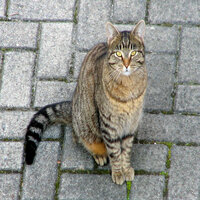

In [88]:
Im(Image1)

In [ ]:
Image2 = '321.jpg'

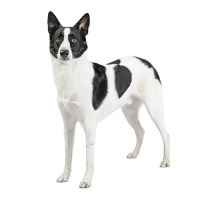

In [ ]:
Im(Image2)

In [89]:
model = keras.models.load_model("model2.h5")
image = tf.keras.preprocessing.image.load_img('1234.jpg')
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = numpy.array([input_arr])  
model.predict(input_arr)

array([[0.]], dtype=float32)

In [90]:
model = keras.models.load_model("model2.h5")
image = tf.keras.preprocessing.image.load_img('1234.jpg')
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = numpy.array([input_arr])  
model.predict(input_arr)

array([[0.]], dtype=float32)

In [91]:
model = keras.models.load_model("model2.h5")
image = tf.keras.preprocessing.image.load_img('321.jpg')
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = numpy.array([input_arr])  
model.predict(input_arr)

array([[1.]], dtype=float32)

In [93]:
model = keras.models.load_model("model2.h5")
image = tf.keras.preprocessing.image.load_img('321.jpg')
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = numpy.array([input_arr])  
model.predict(input_arr)

array([[1.]], dtype=float32)


Итого
Модель 1 70% 
Модель 2 80% 
в конец инф